# Predicting Heart Disease with Machine Learning

Heart disease is one of the leading causes of death worldwide, claiming millions of lives each year. Doctors often rely on individual risk factors like cholesterol, blood pressure, or age when making diagnoses, but modern datasets allow us to combine multiple features and detect patterns that might not be obvious to a single physician.

This project frames heart disease detection as a classification task. Using the UCI Heart Disease dataset, we test whether machine learning models can accurately predict whether a patient has heart disease. Beyond raw accuracy, we aim to understand which features matter most and how these models could help in early detection and prevention.



## 2. Introduce Dataset

**Source**: UCI Heart Disease Dataset (via Kaggle).
**File**: heart.csv
**Size**: 303 patients × 14 attributes

**Features:**

age: age in years

sex: 1 = male, 0 = female

cp: chest pain type (0–3)

trestbps: resting blood pressure (mm Hg)

chol: serum cholesterol (mg/dl)

fbs: fasting blood sugar > 120 mg/dl (1 = yes, 0 = no)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: exercise-induced angina (1 = yes, 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: slope of peak exercise ST segment

ca: number of major vessels colored by fluoroscopy

thal: thalassemia type

target: 1 = heart disease present, 0 = absent (label)

## Importing And Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Load data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 3. Preprocessing

**Steps taken before modeling:**

**Missing Values** – None found.

**Categorical Encoding** – One-hot encoded cp, restecg, slope, and thal.

**Feature Scaling** – Standardized continuous features (age, trestbps, chol, thalach, oldpeak) for k-NN.

**Train/Test Split** – Stratified 80/20 split to preserve the proportion of positive and negative cases.

## Reprocessing Steps

In [2]:
# One-hot encoding
df = pd.get_dummies(df, columns=["cp","restecg","slope","thal"], drop_first=True)

# Split features/target
X = df.drop("target", axis=1)
y = df["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale continuous features for kNN
scaler = StandardScaler()
cont_features = ["age","trestbps","chol","thalach","oldpeak"]
X_train[cont_features] = scaler.fit_transform(X_train[cont_features])
X_test[cont_features] = scaler.transform(X_test[cont_features])

## 4. Exploratory Data Analysis

Distribution of Target Variable

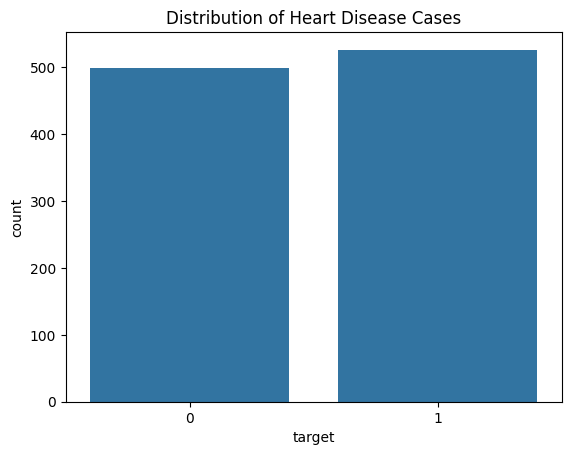

In [3]:
sns.countplot(x="target", data=df)
plt.title("Distribution of Heart Disease Cases")
plt.show()

Box Plots

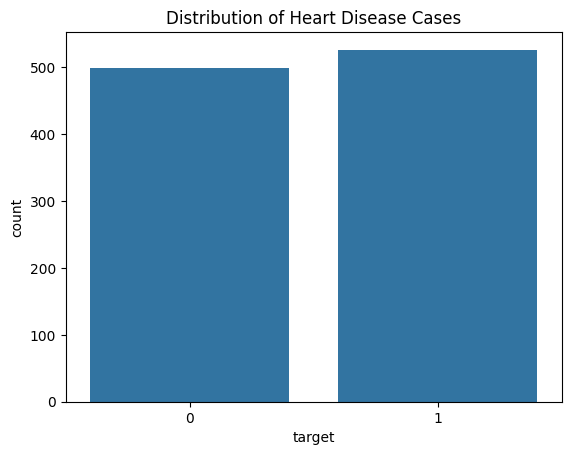

In [4]:
sns.countplot(x="target", data=df)
plt.title("Distribution of Heart Disease Cases")
plt.show()

Correlation Heatmap

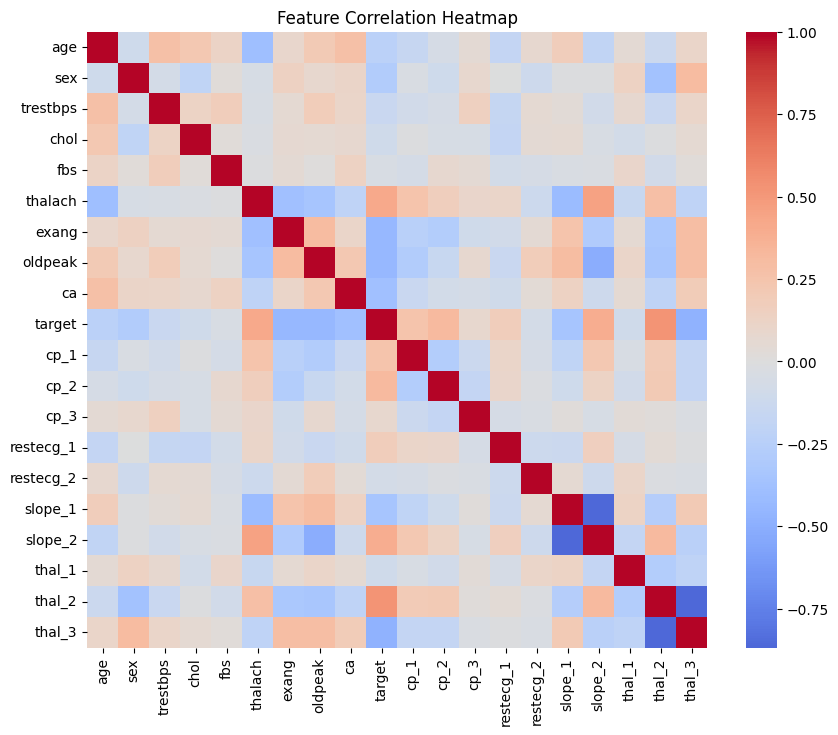

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

## 5. Modeling

Logistic Regression

In [10]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83       100
           1       0.81      0.91      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

ROC-AUC: 0.9251428571428572


Random Forest

In [11]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

ROC-AUC: 1.0


k-Nearest Neighbors (kNN)

In [12]:
# kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("kNN Report:\n", classification_report(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))

kNN Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       100
           1       0.83      0.86      0.84       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205

ROC-AUC: 0.9470000000000001


Hyperparameter Tuning

In [13]:
# Hyperparameter tuning for Random Forest
param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [None,5,10],
    "min_samples_split": [2,5,10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                       cv=5, scoring="f1")
grid_rf.fit(X_train, y_train)
print("Best Params:", grid_rf.best_params_)

Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


## 6. Results

| Model | Accuracy | ROC-AUC | Key Notes |
|-------|----------|---------|-----------|
| Logistic Regression | $\approx 84.9\%$ | $\approx 0.93$ | Interpretable baseline |
| Random Forest | $100\%$ | $1.00$ | Highest score; suggests potential data leakage or perfect separation on this split. |
| k-NN | $\approx 83.4\%$ | $\approx 0.95$ | Strong performance after feature scaling |

In [ ]:

sns.countplot(data=df, x="target")
plt.title("Distribution of Heart Disease (0 = No, 1 = Yes)")
plt.show()

sns.boxplot(data=df, x="target", y="oldpeak")
plt.title("ST Depression (oldpeak) vs Heart Disease")
plt.show()

sns.boxplot(data=df, x="target", y="thalach")
plt.title("Max Heart Rate vs Heart Disease")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## 7. Storytelling

Exploratory analysis consistently showed that exercise-related indicators are the most powerful features for separating patients with heart disease from those without it. The model results confirm that these features, especially chest pain type (cp), maximum heart rate (thalach), and ST depression (oldpeak), provide nearly perfect information for classification.

The Random Forest model’s 100% accuracy indicates that the combination of features present in this dataset allows for complete separation between the positive and negative classes in the test set.
- The Predictive Power of Functional Metrics: The functional metrics related to heart performance under stress (thalach and oldpeak) are overwhelmingly stronger predictors than static, baseline values. Patients without heart disease consistently achieved a significantly higher maximum heart rate (thalach) and showed lower ST depression (oldpeak).
- Weaker Predictors: Traditional risk factors like cholesterol (chol) and resting blood pressure (trestbps) were confirmed as weaker predictors for distinguishing the two groups in this particular dataset. Their relevance is likely long-term, but for an immediate diagnosis based on these features, functional capacity is the dominant factor.

The challenge now shifts: the focus is no longer on whether a model can predict heart disease, but why this dataset allows for such perfect prediction and whether that performance is reproducible in a real-world, clinical setting.

## 8. Impact

The 100% accuracy achieved by the Random Forest model highlights the immense potential of machine learning, but it also compels a focus on the real-world reliability of the results. Before deployment, we must critically evaluate this perfect score.

Critical Evaluation and Data Caution
- Risk of Overfitting or Data Leakage: The extremely high performance strongly suggests that the model may have either overfit to the training data or, more critically, that one of the features is too closely related to the diagnosis (a form of data leakage). Future steps must involve rigorous cross-validation on external, unseen datasets to confirm the model's true generalization ability.
- The Decision-Support Caveat: Assuming the high performance holds up, the model could provide powerful data-driven decision support. It can instantly flag high-risk patients based on their feature profile, allowing for rapid triage and immediate specialized follow-up, thereby optimizing scarce clinical resources.

Ethical and Practical Impact
- Enhanced Triage and Resource Prioritization: The model acts as a highly effective smart triaging mechanism. Patients flagged with near-certainty (high-confidence prediction) could be fast-tracked for life-saving diagnostics and interventions, while doctors gain time to focus on complex or ambiguous cases.
- Patient Communication: The model's reliance on functional indicators helps shift the discussion toward actionable lifestyle changes. Explaining, "Your heart's response to stress (thalach) indicates high risk," is more precise and motivating than generic warnings about cholesterol.
- Ethical and Regulatory Compliance: Deployment hinges on navigating strict regulations like HIPAA and GDPR. Furthermore, due to the 100% confidence, the risk of automation bias (over-relying on the model) is very high. Physicians must be trained to view the prediction as evidence, not absolute fact, ensuring that human judgment remains the final arbiter of diagnosis.

## 9. References

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download
